Menyiapkan pustaka (Library) yg diperlukan:
- networkx: Library ini digunakan untuk menganalisis dan memanipulasi grafik atau jaringan.
- seaborn: Ini adalah library untuk membuat visualisasi data yang menarik dan informatif.
- pandas: Pandas adalah library yang sangat berguna untuk manipulasi dan analisis data tabular.
- numpy: NumPy adalah library yang digunakan untuk komputasi numerik.
- matplotlib.pyplot: Library ini digunakan untuk membuat grafik dan visualisasi data.
- matplotlib.patches.Patch: Ini adalah bagian dari Matplotlib yang memungkinkan Kita untuk membuat bentuk dan pola khusus dalam plot.
- sklearn.cluster.KMeans: KMeans adalah algoritma clustering yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok.
- sklearn.preprocessing.StandardScaler: Digunakan untuk mengubah skala data sehingga memiliki mean nol dan deviasi standar satu.
- sklearn.feature_extraction.text.CountVectorizer: Ini digunakan untuk mengubah teks menjadi representasi numerik.
- scipy.cluster.hierarchy: Ini adalah bagian dari SciPy yang menyediakan alat untuk analisis hierarki data.
- scipy.spatial.distance.pdist: pdist digunakan untuk menghitung jarak antara semua pasangan.
- scipy.spatial.distance.squareform: squareform mengubah hasilnya menjadi matriks jarak.

Penjelasan kode:
- pd.read_csv("./dataset/Social Science A.csv"): 
Ini adalah perintah yang meminta Python untuk membaca isi dari file "Social Science A.csv". File ini harus berada dalam folder "dataset" di direktori kerja saat ini. Pts (pd) akan membantu kita membaca dan memahami data tersebut.
- df:
Ini adalah nama kotak untuk menyimpan data yang telah dibaca. Dengan nama "df," kita bisa dengan mudah mengakses dan memanipulasi data ini di program Python kita.


In [ ]:
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Load data set csv
df = pd.read_csv("./dataset/Social Science A.csv")
# df.set_index('NO ABSEN', inplace=True)
df

Perintah print(df.head()) digunakan untuk mencetak (menampilkan) beberapa baris pertama dari DataFrame yang telah Kita baca sebelumnya ke layar. Ini membantu Kita melihat bagaimana data itu terstruktur dan memberikan gambaran awal tentang isinya.

Secara lebih rinci:
- df: 
Ini adalah variabel yang menyimpan data yang telah dibaca dari file CSV tadi.
- .head():
Ini adalah metode yang digunakan pada objek DataFrame (df). Metode ini secara default akan mencetak lima baris pertama dari data, kecuali Kita\ memberikan jumlah baris yang ingin ditampilkan sebagai argumen (contohnya: .head(10) akan menampilkan 10 baris pertama).

In [29]:
# Pemeriksaan data awal

print(df.head())

           Timestamp                      Email Address  \
0  5/3/2023 19:42:22              cokratu2010@gmail.com   
1  5/3/2023 15:20:48        anugrahwidiantari@gmail.com   
2  5/3/2023 17:41:53  idewaketutwidhisandhyka@gmail.com   
3  5/3/2023 17:47:33          madebaskara2020@gmail.com   
4  5/3/2023 19:49:54              pangkywayan@gmail.com   

                         NAMA LENGKAP  NO ABSEN KELAS  \
0      Cokorda Istri Ratu Giriningrum         1  VIIA   
1           I Dewa Gede Satria Wibawa         2  VIIA   
2  I Dewa Ketut Widhisandhyka Premana         3  VIIA   
3       I Dewa Made Baskara Putradana         4  VIIA   
4                I Gede Candra Winata         5  VIIA   

  1. Teman anda yang paling anda sukai di kelas  \
0                         Ni Made Mia Sukmawati   
1            I Dewa Ketut Widhisandhyka Premana   
2              I Komang Trisna Adi Maha Pratama   
3                          I Gede Candra Winata   
4                                I Gede Pratama

Perintah print(df.isnull().sum()) digunakan untuk mencetak jumlah nilai-nilai null atau hilang (missing values) dalam setiap kolom (variabel) dari DataFrame Kita. Ini membantu Kita memahami sejauh mana data Kita memiliki nilai yang hilang dalam setiap kolom.

Secara lebih rinci:
- df: 
Ini adalah variabel yang menyimpan data yang telah dibaca dari file CSV atau data lainnya.
- .isnull(): 
Ini adalah metode yang digunakan pada objek DataFrame (df) untuk mengidentifikasi nilai yang hilang. Metode ini menghasilkan DataFrame baru dengan nilai True (jika ada nilai yang hilang) atau False (jika tidak ada nilai yang hilang) untuk setiap sel dalam DataFrame asli.
- .sum(): 
Setelah menggunakan .isnull(), metode .sum() digunakan untuk menghitung jumlah nilai True (yaitu, nilai yang hilang) dalam setiap kolom. Hasilnya adalah jumlah nilai yang hilang untuk setiap kolom.

In [30]:
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
cluster                                                0
dtype: int64


- df['Alasan']:
Ini adalah cara untuk mengakses kolom 'Alasan' dalam DataFrame 'df'. Dengan menggunakan tanda kurung siku dan nama kolom, kita memilih kolom yang ingin kita ubah.
- .fillna('Tidak disebutkan', inplace=True):
Ini adalah metode yang digunakan pada kolom 'Alasan'. Metode fillna digunakan untuk menggantikan nilai-nilai yang hilang (NaN) dalam kolom dengan nilai yang diberikan, dalam hal ini, 'Tidak disebutkan'. Parameter inplace=True digunakan untuk mengubah DataFrame asli (df) tanpa perlu menetapkan ulangnya ke variabel lain.

In [31]:
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

- df:
Ini adalah DataFrame yang ingin Kita simpan ke dalam file CSV. DataFrame ini mungkin telah Kita ubah sebelumnya dengan berbagai operasi data.
- .to_csv('./Processed Data A.csv'): 
Ini adalah metode yang digunakan pada DataFrame 'df'. Metode to_csv digunakan untuk menulis atau menyimpan data dari DataFrame ke dalam sebuah file CSV. Dalam hal ini, file CSV akan disimpan dengan nama "Processed Data A.csv" dan akan tersimpan di direktori yang sama dengan script Python Kita (ditentukan dengan './').
- index=False: 
Parameter ini digunakan untuk mengabaikan penambahan indeks baris saat menyimpan DataFrame ke dalam file CSV. Jika index=True, maka indeks baris akan disimpan sebagai kolom tambahan di dalam file CSV, sedangkan jika index=False, indeks baris akan diabaikan.

In [32]:
# Menimpan dataframe yang telah diolah

df.to_csv('./Processed Data A.csv', index=False)

- n = len(df['NAMA LENGKAP'].unique()):
Dalam langkah ini, kita menghitung jumlah nilai unik dalam kolom 'NAMA LENGKAP' dari DataFrame 'df' dan menyimpannya dalam variabel 'n'. Ini akan digunakan untuk menentukan ukuran matriks nanti.
- sosiometri_matrix = np.zeros((n, n)): 
Di sini, kita menggunakan NumPy (dengan np) untuk membuat matriks nol (semua elemen matriks bernilai nol) dengan ukuran n x n. Matriks ini akan digunakan untuk menyimpan data sosiometri atau data yang menggambarkan hubungan antar elemen-elemen dalam kumpulan data.

In [33]:
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

- {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}:
Ini adalah sebuah ekspresi kamus (dictionary comprehension) yang digunakan untuk membuat kamus baru. Kamus ini akan memiliki pasangan kunci (nama) dan nilai (indeks) yang akan digunakan untuk menghubungkan nama dengan posisi indeks dalam suatu struktur data.
- enumerate(df['NAMA LENGKAP'].unique()):
Dalam ekspresi ini, kita menggunakan fungsi enumerate untuk mengambil nilai-nilai unik dalam kolom 'NAMA LENGKAP' dari DataFrame 'df'. Fungsi enumerate mengembalikan indeks (idx) dan nilai (name) dari setiap elemen dalam data tersebut.
Akhirnya, kita memetakan setiap nama ke indeks yang sesuai dalam kamus. Ini akan membantu kita melacak nama-nama tersebut berdasarkan indeksnya.

In [34]:
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

Kode ini melakukan perulangan melalui setiap baris dalam DataFrame 'df' menggunakan df.iterrows(). Untuk setiap baris, ia mengumpulkan nama-nama teman yang disukai dan tidak disukai dalam variabel 'liked_names' dan 'disliked_names'.

Kemudian, ia memeriksa apakah nama-nama tersebut ada dalam kamus 'name_to_index'. Jika ada, ia mengakses matriks sosiometri ('sosiometri_matrix') dan meningkatkan nilai (untuk teman yang disukai) atau mengurangkan nilai (untuk teman yang tidak disukai) pada posisi yang sesuai dalam matriks.

Hasil akhirnya adalah matriks sosiometri yang mencerminkan hubungan antara individu-individu dalam kelas berdasarkan preferensi mereka terhadap teman-teman tertentu. Nilai positif mungkin menunjukkan tingkat keterkaitan atau kesukaan, sedangkan nilai negatif mungkin menunjukkan ketidaksukaan.

In [35]:
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


- plt.figure(figsize=(10, 8)): 
Ini adalah perintah untuk membuat gambar (figure) yang akan digunakan sebagai tempat untuk plot heatmap. Dalam contoh ini, gambar akan memiliki ukuran 10x8 inci.
- sns.heatmap(sosiometri_matrix, cmap='RdBu_r'): 
Ini adalah perintah untuk membuat heatmap menggunakan library Seaborn (sns). Kita memberikan matriks sosiometri ('sosiometri_matrix') sebagai data yang akan diplot. Parameter cmap='RdBu_r' digunakan untuk memilih skema warna yang akan digunakan dalam heatmap. Skema warna 'RdBu_r' menggambarkan nilai positif dengan warna biru dan nilai negatif dengan warna merah.
- plt.show(): 
Ini adalah perintah untuk menampilkan gambar dengan heatmap yang telah dibuat. Jadi, hasil dari semua langkah sebelumnya akan ditampilkan dalam jendela atau output visual.

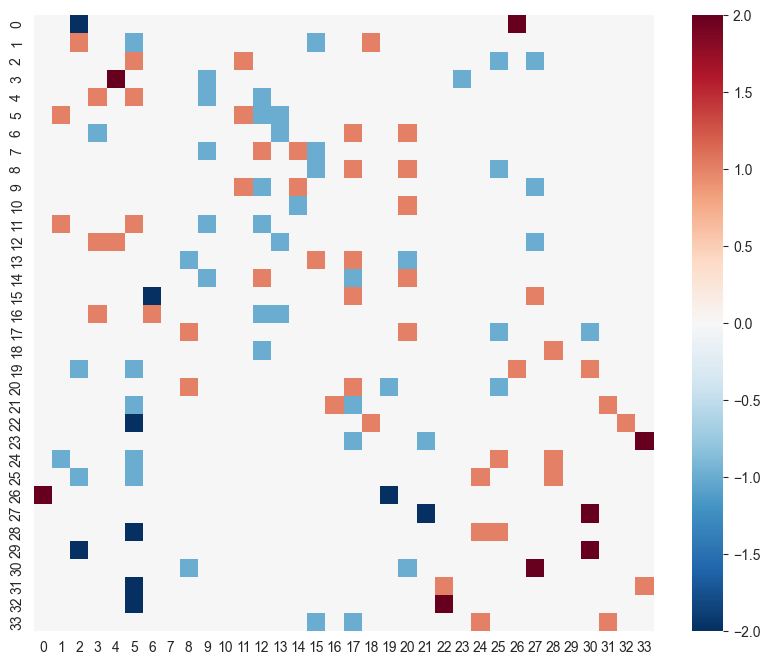

In [36]:
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


- scaler = StandardScaler():
Kita membuat objek scaler yang merupakan instance dari StandardScaler. StandardScaler adalah salah satu teknik penskalaan yang umum digunakan dalam analisis data. Ini akan mengubah setiap kolom dari matriks sosiometri sehingga memiliki rata-rata nol (mean) dan deviasi standar satu (standard deviation).
- sosiometri_scaled = scaler.fit_transform(sosiometri_matrix): 
Kita menggunakan scaler yang telah Kita buat untuk melakukan penskalaan pada matriks sosiometri ('sosiometri_matrix'). Hasilnya akan disimpan dalam sosiometri_scaled. Dengan melakukan penskalaan, Kita mengubah data sehingga memiliki skala yang seragam, yang dapat berguna dalam beberapa analisis statistik dan pemodelan.


In [37]:
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

- wcss = []: 
Ini adalah sebuah list yang akan digunakan untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares) untuk setiap jumlah kluster yang diuji.
- Loop for i in range(1, 11):
Ini adalah loop yang akan mencoba jumlah kluster dari 1 hingga 10. Kita akan melihat bagaimana nilai WCSS berubah seiring dengan peningkatan jumlah kluster.
- Di dalam loop, kita membuat sebuah model K-Means dengan KMeans(n_clusters=i, init='k-means++', random_state=42). n_clusters=i mengatur jumlah kluster sesuai dengan iterasi saat ini. init='k-means++' adalah cara yang lebih baik untuk menginisialisasi pusat kluster, dan random_state=42 digunakan untuk hasil yang dapat direproduksi.
- Selanjutnya, kita melatih model K-Means pada data yang telah diubah skala sosiometri_scaled.
Nilai WCSS (Within-Cluster Sum of Squares) untuk model saat ini dihitung dengan kmeans.inertia_ dan dimasukkan ke dalam list wcss.
Setelah loop selesai, kita membuat plot dengan matplotlib. Plot ini akan menunjukkan bagaimana nilai WCSS berubah seiring dengan peningkatan jumlah kluster.
- Pada akhirnya, kita menampilkan plot yang menunjukkan "Metode Siku (Elbow Method)" untuk membantu kita memilih jumlah kluster yang optimal. Biasanya, kita mencari lokasi di mana grafik menunjukkan "elbow" atau siku, yang dapat menjadi pilihan yang baik untuk jumlah kluster yang optimal.

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-pWEnPeR3-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-pWEnPeR3-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-pWEnPeR3-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

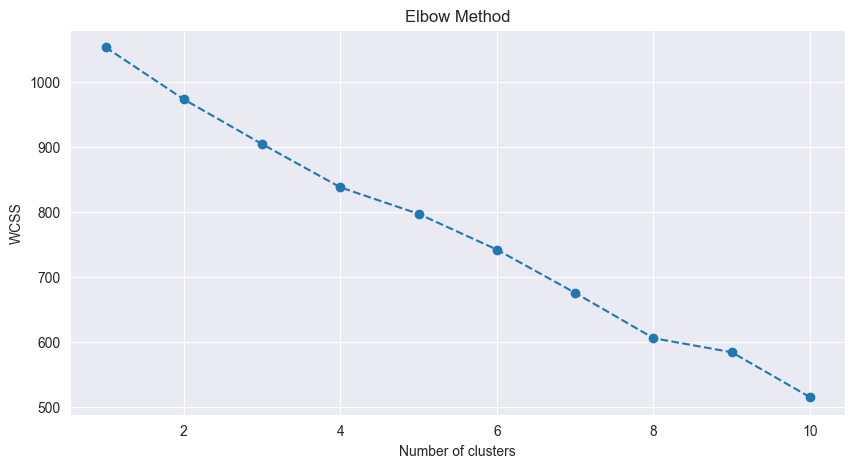

In [38]:
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- optimal_clusters = 2: 
Di sini, kita menetapkan jumlah kluster yang telah kita pilih sebagai 2, berdasarkan hasil analisis elbow yang telah kita lakukan sebelumnya. Kita dapat mengganti nilai ini sesuai dengan jumlah kluster yang Kita anggap optimal.
- kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42): 
Kode ini digunakan untuk membuat model K-Means dengan jumlah kluster yang telah kita pilih sebagai optimal_clusters. Parameter init='k-means++' digunakan untuk menginisialisasi pusat kluster dengan cara yang lebih baik, dan random_state=42 digunakan untuk hasil yang dapat direproduksi.
- Selanjutnya, kita menggunakan kmeans.fit_predict(sosiometri_scaled) untuk menghitung kluster (kelompok) yang sesuai untuk setiap data dalam sosiometri_scaled. Hasilnya adalah clustered_students, yang akan berisi indeks kluster (0 atau 1 dalam kasus ini) untuk setiap data atau siswa.

In [39]:
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-pWEnPeR3-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


- `df['Cluster'] = clustered_students` digunakan untuk menambahkan kolom baru bernama 'Cluster' ke dalam DataFrame 'df' dan mengisinya dengan hasil clustering yang telah dilakukan sebelumnya. 

- Pada tahap ini, kolom 'Cluster' akan berisi angka yang menunjukkan kluster (kelompok) mana setiap data siswa termasuk. Ini akan memungkinkan kita untuk dengan mudah mengidentifikasi dan membedakan siswa-siswa dalam masing-masing kluster ketika kita melakukan analisis lanjutan atau visualisasi data.

In [40]:
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

df[df['Cluster'] == 0]: 
Ini adalah ekspresi pemfilteran yang digunakan pada DataFrame 'df'. Ini akan menghasilkan subset dari DataFrame yang hanya berisi baris-baris di mana nilai kolom 'Cluster' adalah 0.

In [41]:
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                       Email Address  \
0    5/3/2023 19:42:22               cokratu2010@gmail.com   
2    5/3/2023 17:41:53   idewaketutwidhisandhyka@gmail.com   
3    5/3/2023 17:47:33           madebaskara2020@gmail.com   
4    5/3/2023 19:49:54               pangkywayan@gmail.com   
5   5/16/2023 18:56:55                 putu09ama@gmail.com   
6    6/7/2023 21:17:56      nikomangsulastriasih@gmail.com   
7    5/5/2023 10:33:47  ikadekrehandwipermana265@gmail.com   
8    5/3/2023 20:45:09                   dekyo47@gmail.com   
9    5/4/2023 18:43:15         kadeksuartana1711@gmail.com   
10  5/22/2023 16:55:59            subandikadek19@gmail.com   
11   5/3/2023 17:51:38           komangtrisnaa98@gmail.com   
12   5/3/2023 18:10:26   komangwahyupremanaputra@gmail.com   
14   6/7/2023 21:29:44      nikomangsulastriasih@gmail.com   
16   5/3/2023 18:51:26        wayansivapradiyoga@gmail.com   
17   5/4/2023 18:17:05           wayanyudista135@gmail.com   
18   5/3

- G: 
Ini adalah nama variabel yang digunakan untuk menyimpan objek graf berarah yang baru dibuat.
- nx.DiGraph():
Ini adalah konstruktor yang digunakan untuk membuat graf berarah. Dalam hal ini, kami menggunakan DiGraph() dari library NetworkX (nx) untuk membuat graf yang memiliki arah pada setiap sambungannya. Graf berarah adalah graf di mana setiap sambungan memiliki arah atau panah yang menghubungkan dua simpul (node) dan dapat digunakan untuk menggambarkan hubungan yang memiliki arah, seperti relasi antara dua entitas dalam jaringan.

In [42]:
# Inisiasi graf berarah

G = nx.DiGraph()

- for idx, row in df.iterrows(): 
Ini adalah loop yang akan mengiterasi melalui setiap baris (data siswa) dalam DataFrame 'df'. Loop ini akan membantu kita menambahkan simpul untuk setiap siswa ke dalam graf 'G'.
- G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster']): 
- Dalam setiap iterasi, kita menggunakan G.add_node(...) untuk menambahkan simpul ke dalam graf. row['NAMA LENGKAP'] digunakan sebagai nama simpul, yang diambil dari kolom 'NAMA LENGKAP' dalam DataFrame. row['Cluster'] digunakan sebagai atribut simpul yang disebut 'cluster', yang akan menyimpan informasi tentang kluster ke mana siswa tersebut termasuk.

In [43]:
# Tambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


- for idx, row in df.iterrows(): 
Ini adalah loop yang mengiterasi melalui setiap baris (data siswa) dalam DataFrame 'df'. Loop ini digunakan untuk menambahkan sambungan (edges) ke dalam graf 'G' berdasarkan preferensi teman dalam data siswa.
- Untuk setiap siswa, kita memeriksa teman yang disukai (liked friends) dan teman yang tidak disukai (disliked friends) dalam DataFrame.
- Dalam setiap iterasi, kita menggunakan if untuk memeriksa apakah teman yang disebutkan dalam kolom '1. Teman anda yang paling anda sukai di kelas' atau '2. Teman anda yang paling anda tidak sukai di kelas' termasuk dalam simpul-simpul yang sudah ada dalam graf 'G'. Jika termasuk, kita menambahkan sambungan (edge) antara siswa (simpul 'NAMA LENGKAP') dengan teman tersebut. Bobot sambungan ditentukan sebagai 1 untuk teman yang disukai dan -1 untuk teman yang tidak disukai.

In [44]:
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


- fig, ax = plt.subplots(figsize=(15, 15)):
Ini adalah langkah pertama dalam menggambar graf. Kita membuat objek gambar dan objek sumbu (axis) dengan ukuran figur (figure) yang telah ditentukan.
- colors = [node[1]['cluster'] for node in G.nodes(data=True)]:
Kita membuat daftar warna (colors) berdasarkan atribut 'cluster' dari setiap simpul (node) dalam graf 'G'. Ini berarti Kita akan memberikan warna yang berbeda kepada setiap simpul sesuai dengan kluster (cluster) ke mana mereka termasuk.
- pos = nx.spring_layout(G):
Kita menentukan tata letak (layout) dari simpul-simpul dalam graf. Dalam kasus ini, Kita menggunakan tata letak spring_layout dari NetworkX, yang akan menempatkan simpul-simpul secara terpisah dalam sebuah tata letak yang terlihat lebih baik. Kita bisa mencoba tata letak lainnya seperti shell_layout, circular_layout, dan lain-lain.
- nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000):
Kita menggunakan nx.draw() untuk menggambar graf berdasarkan tata letak yang telah ditentukan sebelumnya. Parameter yang digunakan antara lain:
  - G: Graf yang akan digambar.
  - pos: Tata letak simpul.
  - ax: Sumbu (axis) tempat graf akan digambar.
  - with_labels=True: Menampilkan label pada simpul.
  - node_color=colors: Memberikan warna kepada simpul sesuai dengan kluster.
  - cmap=plt.cm.RdBu: Skema warna yang digunakan (dalam hal ini, RdBu yang telah ditentukan).
  - font_size=10: Ukuran font untuk label simpul.
  - node_size=1000: Ukuran simpul.
- ax.set_title('Graf Berarah Sosiometri'):
Memberikan judul (title) pada graf yang telah digambar.
- plt.show():
untuk menampilkan graf berarah sosiometri ke dalam jendela grafis. Hasilnya adalah visualisasi graf berarah yang mencerminkan hubungan antara siswa dalam kluster berdasarkan preferensi teman-teman mereka.

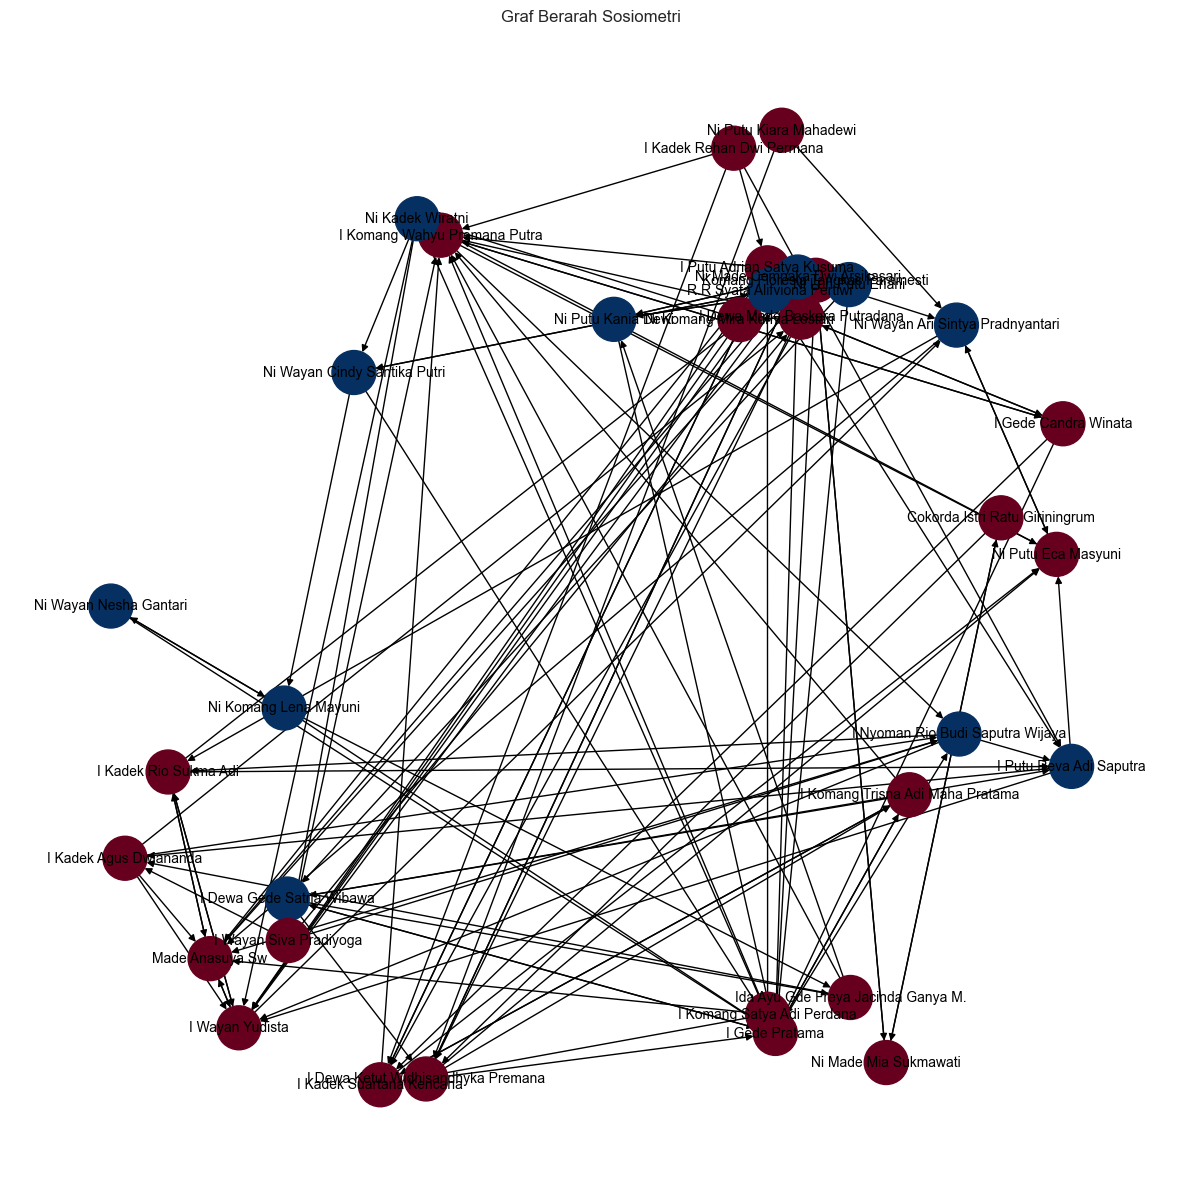

In [45]:
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

- in_degrees = dict(G.in_degree(weight='weight')):
in_degrees adalah variabel yang akan berisi derajat masuk dari setiap simpul dalam graf 'G'. Derajat masuk adalah jumlah dari bobot (weight) semua sambungan yang menuju ke simpul tersebut. Dalam kasus ini, Kita menggunakan G.in_degree(weight='weight') untuk menghitung derajat masuk dengan memperhatikan bobot sambungan.
- out_degrees = dict(G.out_degree(weight='weight')):
out_degrees adalah variabel yang akan berisi derajat keluar dari setiap simpul dalam graf 'G'. Derajat keluar adalah jumlah dari bobot (weight) semua sambungan yang keluar dari simpul tersebut. Dalam kasus ini, Kita menggunakan G.out_degree(weight='weight') untuk menghitung derajat keluar dengan memperhatikan bobot sambungan.

In [46]:
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


- df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees):
ini adalah langkah pertama dalam menambahkan kolom baru. Kita menggunakan map untuk memetakan nilai derajat masuk (in_degree) dari setiap simpul (siswa) ke kolom 'in_degree' dalam DataFrame 'df' berdasarkan nama lengkap ('NAMA LENGKAP') siswa.
- df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees):
ini adalah langkah kedua dalam menambahkan kolom baru. Kita menggunakan map untuk memetakan nilai derajat keluar (out_degree) dari setiap simpul (siswa) ke kolom 'out_degree' dalam DataFrame 'df' berdasarkan nama lengkap ('NAMA LENGKAP') siswa.
- df['total_degree'] = df['in_degree'] + df['out_degree']:
ini adalah langkah ketiga dalam menambahkan kolom baru. Kita membuat kolom 'total_degree' dengan menghitung jumlah derajat masuk dan keluar untuk setiap siswa. Ini akan memberikan total derajat (total_degree) dari setiap siswa, yang mencerminkan sejauh mana siswa tersebut terlibat dalam interaksi dengan teman-teman mereka dalam graf berarah 'G'.

In [47]:
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


- most_mentioned = df.sort_values(by='total_degree', ascending=False).head():
Di sini, Kita menggunakan df.sort_values(by='total_degree', ascending=False) untuk mengurutkan DataFrame 'df' berdasarkan kolom 'total_degree' secara menurun (descending order), yang berarti siswa dengan total derajat tertinggi akan muncul di bagian atas.
Kemudian, Kita menggunakan .head() untuk mengambil lima (default) baris pertama dari DataFrame yang telah diurutkan. Ini akan memberikan lima siswa dengan total derajat tertinggi.
- print("Siswa yang Paling Sering Disebutkan:") print(most_mentioned):
Kita mencetak lima siswa yang paling sering disebutkan bersama dengan judul "Siswa yang Paling Sering Disebutkan".
- least_mentioned = df.sort_values(by='total_degree').head():
Di sini, Kita menggunakan df.sort_values(by='total_degree') untuk mengurutkan DataFrame 'df' berdasarkan kolom 'total_degree' secara default (ascending order), yang berarti siswa dengan total derajat terendah akan muncul di bagian atas.
Kemudian, Kita menggunakan .head() untuk mengambil lima (default) baris pertama dari DataFrame yang telah diurutkan. Ini akan memberikan lima siswa dengan total derajat terendah.
- print("\nSiswa yang Paling Jarang Disebutkan:") print(least_mentioned):
Kita mencetak lima siswa yang paling jarang disebutkan bersama dengan judul "Siswa yang Paling Jarang Disebutkan".

In [48]:
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
            Timestamp                Email Address  \
28  5/5/2023 18:22:22        kaniaputu78@gmail.com   
31  5/6/2023 19:25:24  santikaputricindy@gmail.com   
24  5/3/2023 17:52:38          erixxzenn@gmail.com   
22  5/6/2023 19:43:02        lenamayuni7@gmail.com   
20  5/3/2023 20:48:09           suyak224@gmail.com   

                    NAMA LENGKAP  NO ABSEN KELAS  \
28            Ni Putu Kania Dewi        29  VIIA   
31  Ni Wayan Cindy Santika Putri        32  VIIA   
24            Ni Luh Putu Eriani        25  VIIA   
22         Ni Komang Lena Mayuni        23  VIIA   
20               Made Anasuya Sw        21  VIIA   

   1. Teman anda yang paling anda sukai di kelas  \
28                            Ni Luh Putu Eriani   
31                   R.R Syafa Alifviona Pertiwi   
24                Ni Made Cempaka Dwi Arsikasari   
22            Ida Ayu Gde Freya Jacinda Ganya M.   
20                               I Wayan Yudista   

            

- node_sizes = [in_degrees[node] * 100 for node in G.nodes()]:
Di sini, Kita membuat daftar node_sizes yang berisi ukuran simpul (node) untuk setiap simpul dalam graf 'G'. Ukuran simpul dihitung dengan mengalikan bobot derajat masuk (in_degree) dari masing-masing simpul dengan 100. Ini akan memberikan ukuran simpul yang lebih besar untuk simpul-simpul dengan derajat masuk yang lebih tinggi.
- fig, ax = plt.subplots(figsize=(15, 15)):
Kita membuat objek gambar dan objek sumbu (axis) dengan ukuran figur (figure) yang telah ditentukan.
- nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax):
Kita menggunakan nx.draw() untuk menggambar graf berdasarkan tata letak yang telah ditentukan sebelumnya. Parameter node_size digunakan untuk mengatur ukuran simpul berdasarkan daftar node_sizes yang telah Kita hitung sebelumnya.
- ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot'):
Kita memberikan judul (title) pada graf yang telah digambar.
- plt.show()
Terakhir, Kita menggunakan plt.show() untuk menampilkan graf berarah sosiometri ke dalam jendela grafis. Hasilnya adalah visualisasi graf berarah dengan ukuran simpul yang mencerminkan bobot derajat masuk dari setiap simpul. Semakin besar ukuran simpul, semakin tinggi bobot derajat masuknya. Ini dapat membantu Kita memvisualisasikan simpul-simpul yang lebih penting dalam graf berdasarkan preferensi teman-teman mereka.

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-pWEnPeR3-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-pWEnPeR3-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


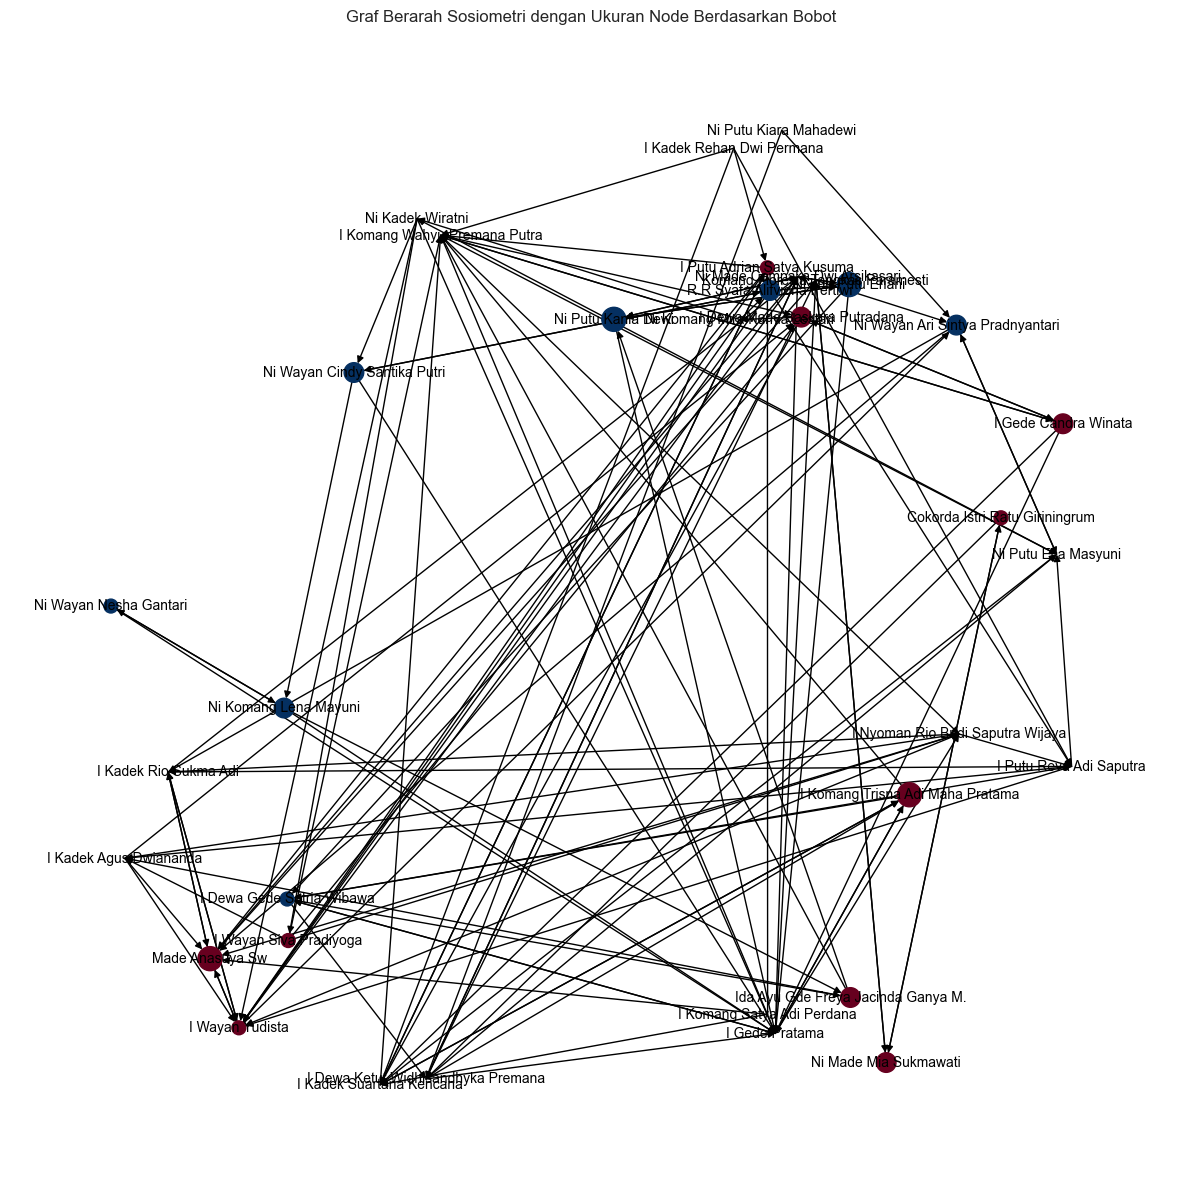

In [49]:
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


Fungsi welch_powell(graph) adalah implementasi algoritma pewarnaan graf Welch-Powell. Ini adalah algoritma untuk pewarnaan simpul dalam sebuah graf sehingga setiap simpul yang berbagi sambungan (edge) tidak memiliki warna yang sama. Berikut adalah penjelasan tentang bagaimana fungsi ini bekerja:

- color_map = {}: 
Ini adalah kamus yang akan digunakan untuk memetakan setiap simpul ke warna yang diberikan.
- colors = []:
Ini adalah daftar yang akan digunakan untuk menyimpan daftar warna yang digunakan.
- nodes_sorted_by_degree:
Ini adalah daftar simpul dalam graf yang diurutkan berdasarkan derajatnya (jumlah sambungan yang dimiliki oleh setiap simpul), dengan urutan dari yang tertinggi ke yang terendah.
Selanjutnya, dalam loop for node in nodes_sorted_by_degree:, fungsi melakukan langkah-langkah berikut untuk setiap simpul:
  - Membuat available_colors yang merupakan daftar dengan panjang yang sama dengan jumlah simpul dalam graf, diinisialisasi dengan nilai True untuk semua elemennya. Daftar ini akan digunakan untuk melacak warna-warna yang tersedia untuk simpul tersebut.
  - Memeriksa setiap tetangga (neighbor) dari simpul saat ini dan memeriksa jika tetangga tersebut sudah diberi warna (neighbor in color_map). Jika sudah diberi warna, maka warna tersebut menjadi tidak tersedia dalam daftar available_colors, sehingga diindeks dalam daftar tersebut menjadi False.
  - Kemudian, dalam loop for color, available in enumerate(available_colors):, fungsi mencari warna yang tersedia pertama yang memiliki nilai True dalam daftar available_colors. Ini berarti simpul saat ini akan diberi warna yang pertama kali tersedia.
  - Fungsi kemudian memetakan simpul ke warna yang ditemukan, yaitu color_map[node] = color.
  - Jika warna tersebut belum ada dalam daftar colors, maka warna tersebut ditambahkan ke daftar colors.
- fungsi mengembalikan color_map:
yang berisi pemetaan warna untuk setiap simpul, serta jumlah warna yang digunakan dalam pewarnaan graf.

In [50]:
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


- color_map, num_colors = welch_powell(G):
Kita memanggil fungsi welch_powell(G) untuk melakukan pewarnaan simpul dalam graf 'G'. Hasil dari pemanggilan ini adalah dua nilai yang disimpan dalam variabel color_map dan num_colors.
  - color_map: 
    Ini adalah kamus yang memetakan setiap simpul ke warna yang telah diberikan.
  - num_colors: 
    Ini adalah jumlah warna yang digunakan dalam pewarnaan graf.
- colors = [color_map[node] for node in G.nodes()]:
Kita membuat daftar colors dengan memetakan setiap simpul dalam graf 'G' ke warna yang sesuai dari kamus color_map. Dengan ini, Kita memiliki daftar warna yang sesuai dengan setiap simpul dalam graf, yang dapat digunakan untuk tujuan visualisasi atau analisis lebih lanjut.

In [51]:
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


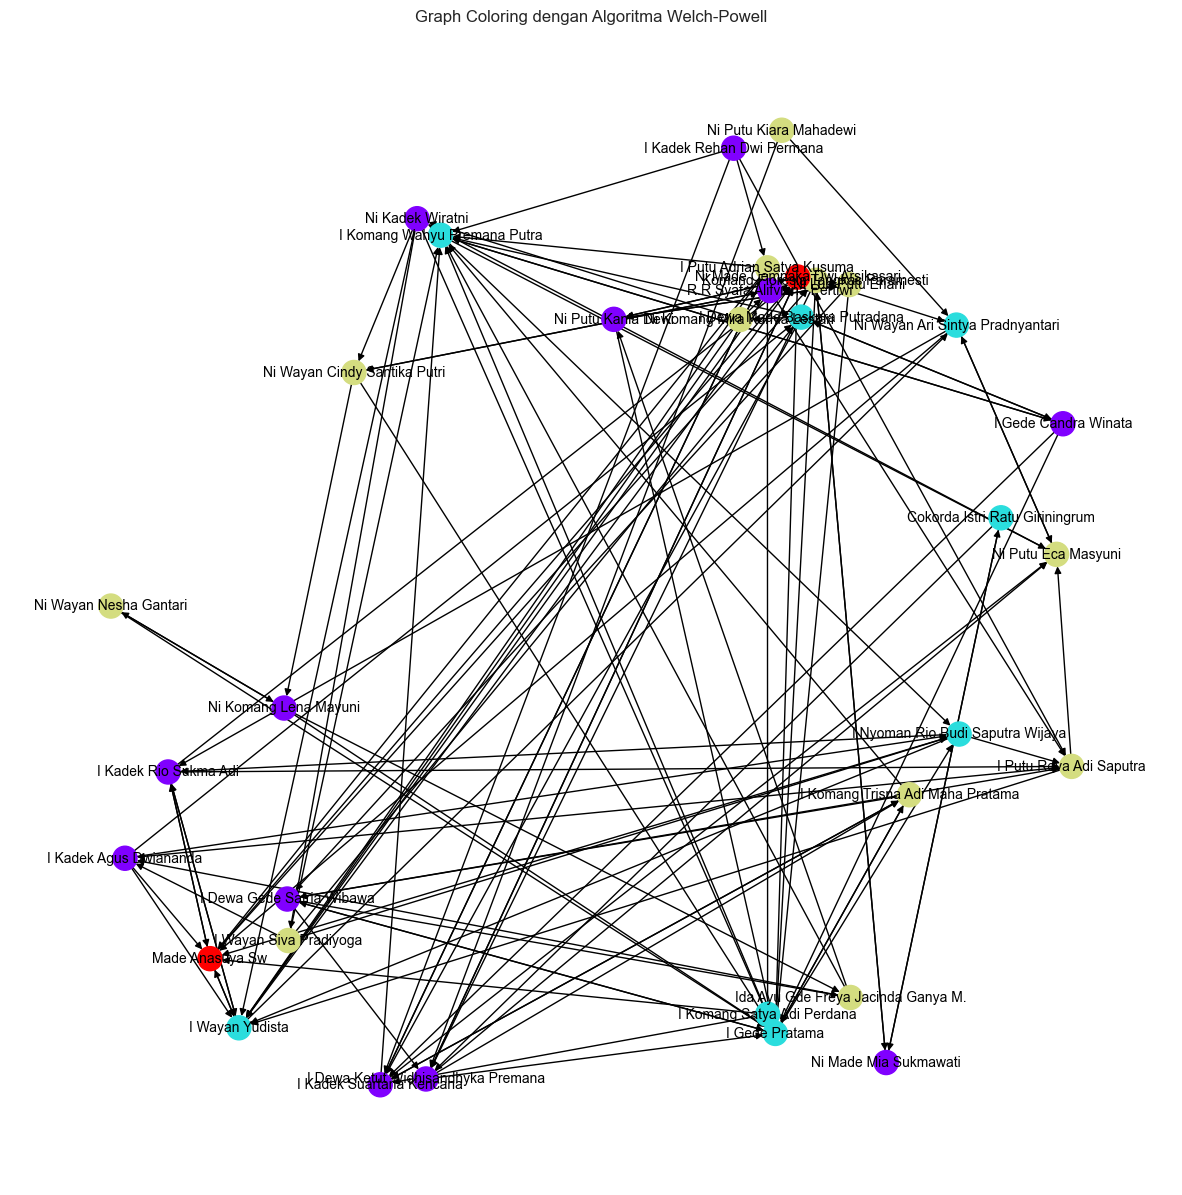

In [52]:
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


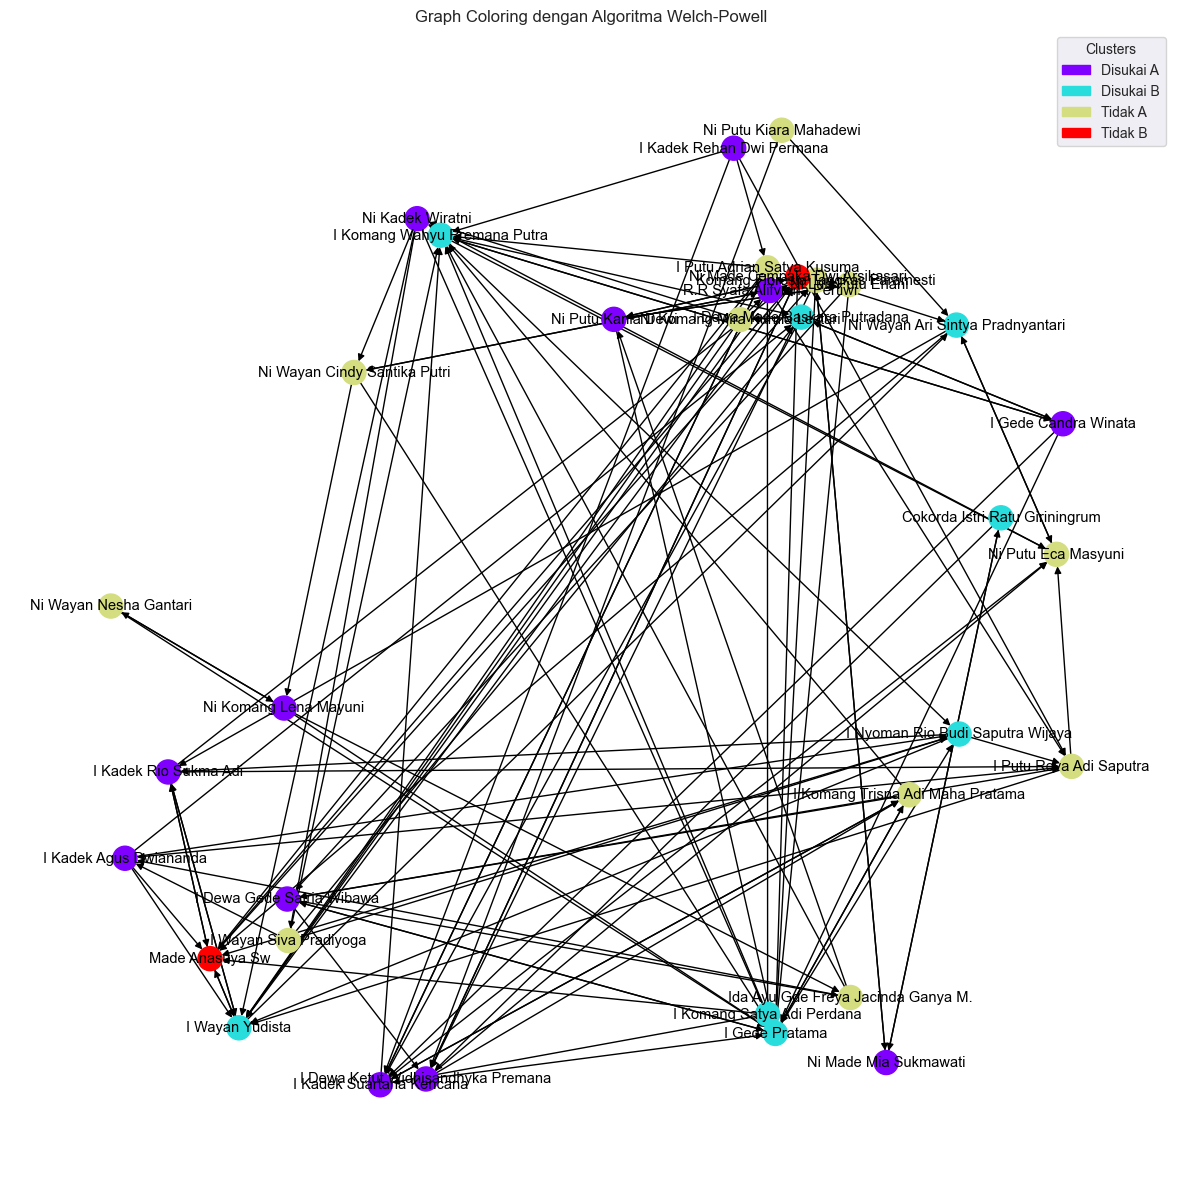

'\nungu = 12\ntoska = 8\nalpukat = 12\nmerah = 2\n'

In [64]:
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


"""
ungu = 12
toska = 8
alpukat = 12
merah = 2
"""


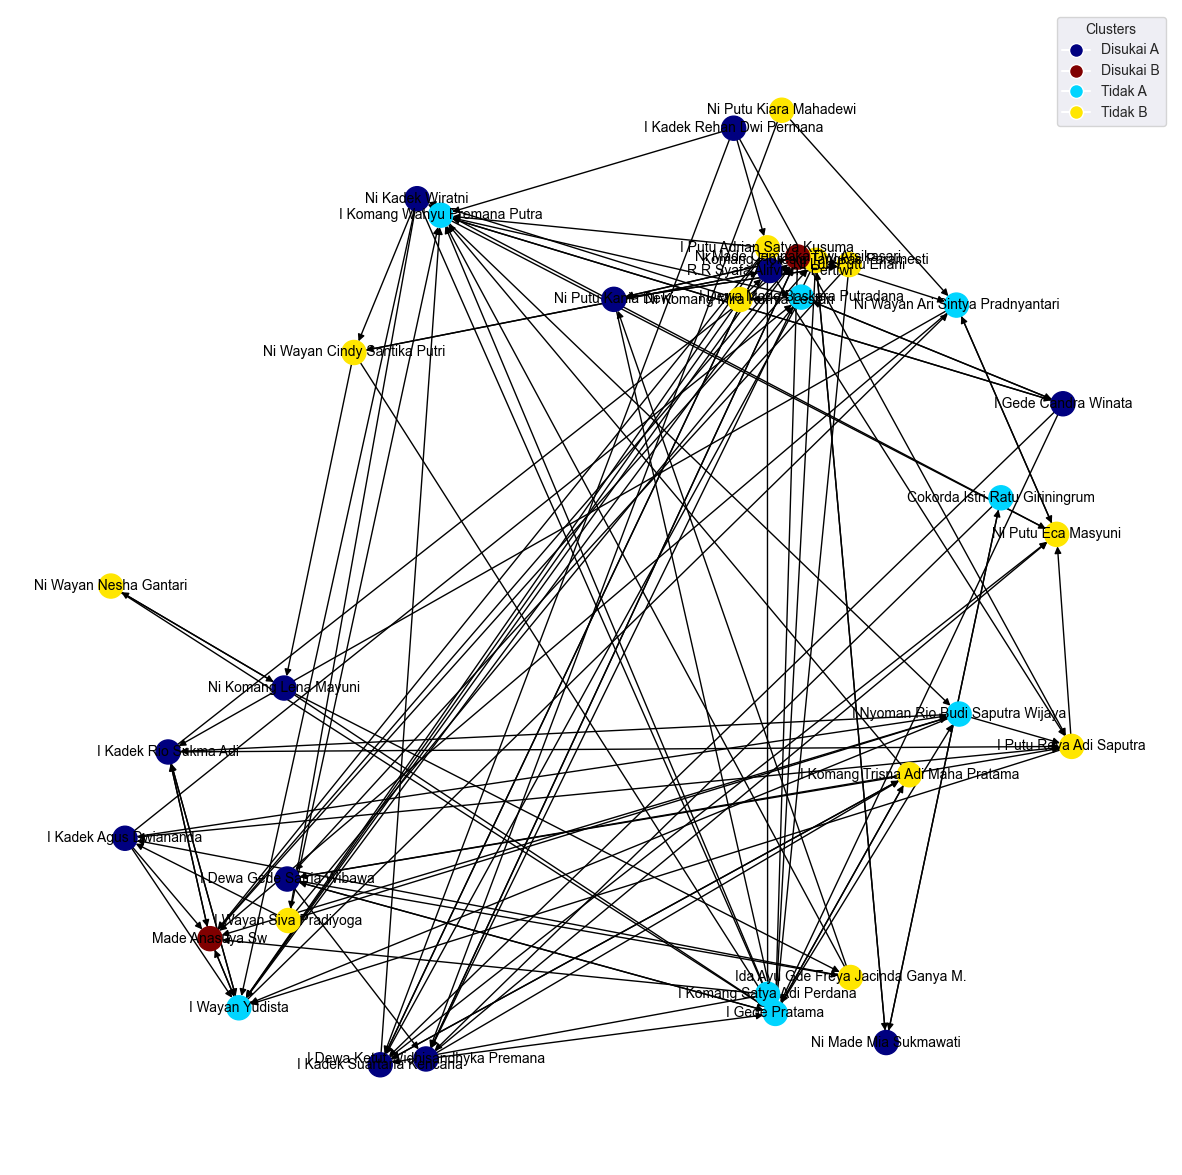

In [65]:
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0], 
                      [0], 
                      marker='o', 
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [66]:
bobot = {}
missing_nodes = []

for node in missing_nodes:
    bobot[node] = 0
    
for color_group in set(colors):
    nodes_in_group = [node for node, color in enumerate(colors) if color == color_group]
    for node in nodes_in_group:
        if node not in bobot:
            missing_nodes.append(node)

print("Nodes yang hilang:", missing_nodes)

for node in G.nodes():
    bobot[node] = G.degree(node)

cluster_bobot_avg = {}

for color_group in set(colors):
    nodes_in_group = [node for node, color in enumerate(colors) if color == color_group]
    # avg_bobot = np.mean([bobot[node] for node in nodes_in_group])
    avg_bobot = [node for node, color]
    cluster_bobot_avg[color_group] = avg_bobot

sorted_clusters_by_bobot = sorted(cluster_bobot_avg.items(), 
                                  key=lambda x: x[1],
                                  reverse=True)

custom_labels = {
    sorted_clusters_by_bobot[0][0]: "Popular A",
    sorted_clusters_by_bobot[1][0]: "Popular B",
    sorted_clusters_by_bobot[2][0]: "Terisolir A",
    sorted_clusters_by_bobot[3][0]: "Terisolir B"
}

# Kode visualisasi yang sama seperti sebelumnya:

cmap = plt.cm.jet
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

nx.draw(G, 
        pos,
        with_labels=True, 
        node_color=mapped_colors,
        font_size=10,
        ax=ax)

unique_color_groups = list(set(colors))
unique_colors_mapped = [cmap(norm(value)) for value in unique_color_groups]
handles = [plt.Line2D([0], 
                      [0],
                      marker='o', 
                      color='w',
                      label=custom_labels[group],
                      markersize=10,
                      markerfacecolor=color) for group, color in zip(unique_color_groups, 
                                                                     unique_colors_mapped)]

ax.legend(handles=handles, title="Clusters")

plt.show()


Nodes yang hilang: [1, 2, 4, 6, 7, 8, 9, 21, 22, 26, 28, 33, 0, 3, 5, 10, 12, 13, 17, 30, 11, 14, 15, 16, 18, 19, 23, 24, 27, 29, 31, 32, 20, 25]


KeyError: 1

In [5]:
from pyspark.shell import spark

df = spark.read.csv("dataset/Social Science A.csv", header=True)

# Select subset of features and filter for balance > 0
filtered_df = df.select("NAMA LENGKAP.first")

# Generate summary statistics
filtered_df.summary().show()

AnalysisException: [INVALID_EXTRACT_BASE_FIELD_TYPE] Can't extract a value from "NAMA LENGKAP". Need a complex type [STRUCT, ARRAY, MAP] but got "STRING".

In [14]:
df.fillna(df.median(), inplace=True)  # Mengisi NaN dengan median kolom


TypeError: could not convert string to float: '5/3/2023 19:42:22'

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Ganti inf dengan NaN
df.dropna(inplace=True)  # Kemudian buang baris dengan NaN


In [13]:
distances = pdist(df.values, metric='euclidean')
distance_matrix = squareform(distances)

ValueError: Unsupported dtype object

In [12]:
linked = linkage(distance_matrix, 'single')  # Kita bisa mengganti 'single' dengan 'complete', 'average', dll. tergantung kebutuhan

# Plot dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', labels=labels, distance_sort='descending', show_leaf_counts=True)
plt.show()


NameError: name 'distance_matrix' is not defined

In [11]:
clusters = fcluster(linked, 4, criterion='maxclust')


NameError: name 'linked' is not defined

In [10]:
# Menggunakan NetworkX untuk visualisasi
colors = clusters
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, font_size=10, ax=ax)
ax.set_title('Hierarchical Clustering of Students')


NameError: name 'clusters' is not defined

In [2]:
from cryptography.fernet import Fernet
key = Fernet.generate_key()
print(key.decode())

47qnM4PgpymcXPS28ltKOqZNjtR8XNDfICq3FNPFfB8=
